In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Učitavanje podataka (broj redova (primjera) i stupaca (značajki) te njihova imena (Pregnancies, Glucose, ...))

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Prikaz deskriptivne statistike (minimum, maksimum, aritmetička sredina...)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#Broj jedinstvenih vrijednosti po značajkama

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [52]:
#Provjera tipova podataka (svi su numerički - olakšava rukovanje nad njima)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
#Provjera koliko podataka ima vrijednost NaN

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
#Značajka čije vrijednosti na prvi pogled jako odskaču je "Insulin" (mean + 3 * std = 425.5, a maksimalna vrijednost je 846)

print('Insulin >= 500: ', (df.Insulin >= 500).sum())
print('Insulin >= 600: ', (df.Insulin >= 600).sum())
print('Insulin >= 700: ', (df.Insulin >= 700).sum())
print('Insulin >= 800: ', (df.Insulin >= 800).sum())

Insulin >= 500:  9
Insulin >= 600:  4
Insulin >= 700:  2
Insulin >= 800:  1


Insulin >= 319:  34


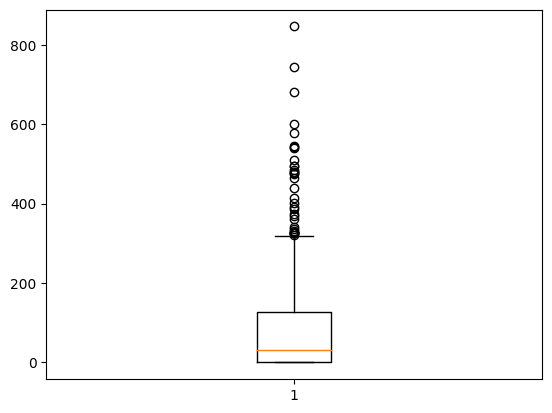

In [93]:
#Na kutijastom grafu se stršeće vrijednosti još bolje primjećuju
#Gornji "whisker" iznosi Q3 + 1.5 * (Q3 - Q1) = 318.125, tj. 319 jer je tip značajke insulin int64 -> 34 stršeće vrijednosti

plt.boxplot(df.Insulin)
print('Insulin >= 319: ', (df.Insulin >= 319).sum())

DPF > 1.2:  29


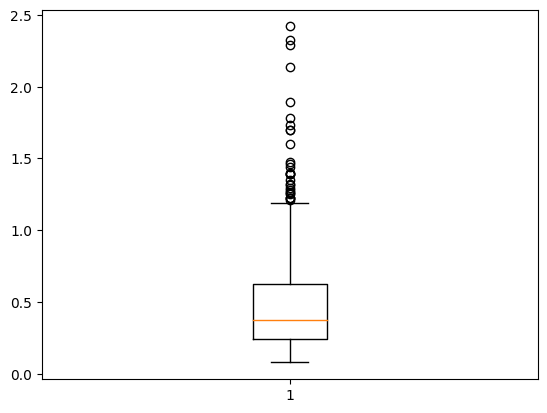

In [21]:
#Još jedna značajka čije vrijednosti značajno odskaču je "DiabetesPedigreeFunction" - 29 stršećih vrijednosti

plt.boxplot(df.DiabetesPedigreeFunction)
print('DPF > 1.2: ', (df.DiabetesPedigreeFunction > 1.2).sum())

Pregnancies >= 14:  4


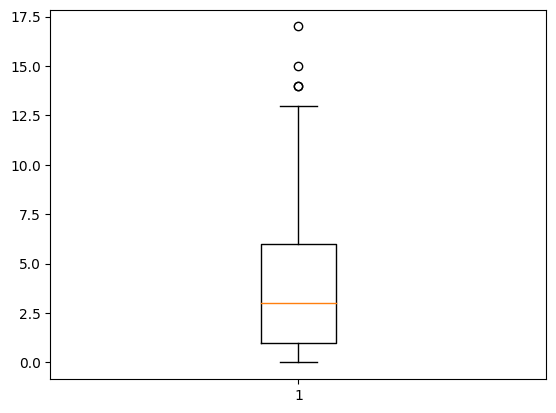

In [88]:
#Slijede kutijasti grafovi ostalih značajki - "Pregnancies" (4 stršeće vrijednosti)

plt.boxplot(df.Pregnancies)
print('Pregnancies >= 14: ', (df.Pregnancies >= 14).sum())


Skin Thickness >= 81:  1


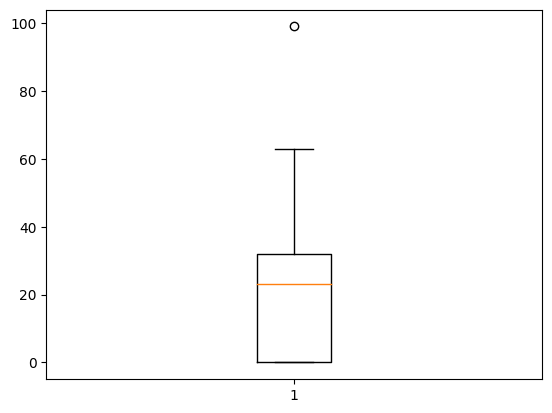

In [26]:
#Zatim značajka "SkinThickness" - 1 stršeća vrijednost

plt.boxplot(df.SkinThickness)
print('\nSkin Thickness >= 81: ', (df.SkinThickness >= 81).sum())

Age >= 67:  9


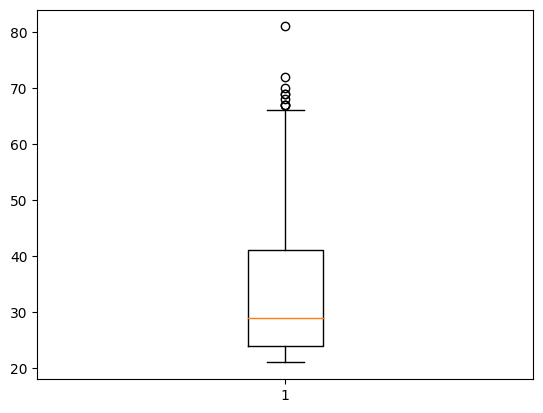

In [28]:
#Potom značajka "Age" - 9 stršećih vrijednosti

plt.boxplot(df.Age)
print('Age >= 67: ', (df.Age >= 67).sum())


BMI < 13.35:  11
BMI > 50.55:  8


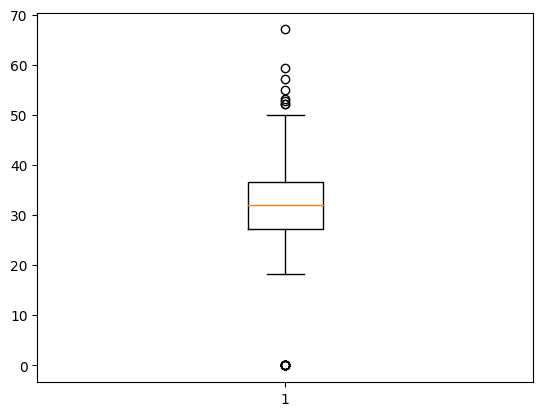

In [9]:
#Kod značajke "BMI" se nazire da postoje nedostajuće vrijednosti 0

plt.boxplot(df.BMI)
print('\nBMI < 13.35: ', (df.BMI < 13.35).sum())
print('BMI > 50.55: ', (df.BMI > 50.55).sum())

Glucose <= 37:  5


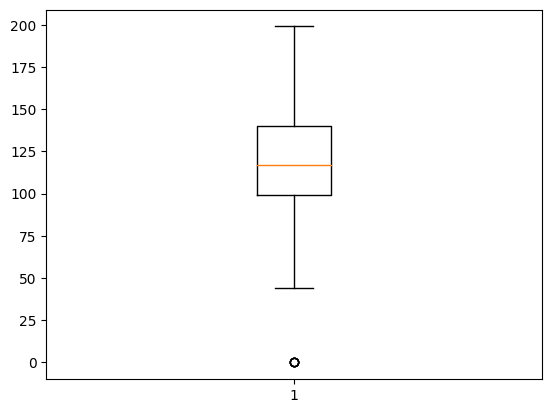

In [17]:
#Slično se može vidjeti i na grafu za značajku "Glucose"

plt.boxplot(df.Glucose)
print('Glucose <= 37: ', (df.Glucose <= 37).sum())

Blood Pressure <= 20:  35
Blood Pressure <= 34:  38
Blood Pressure >= 108:  7


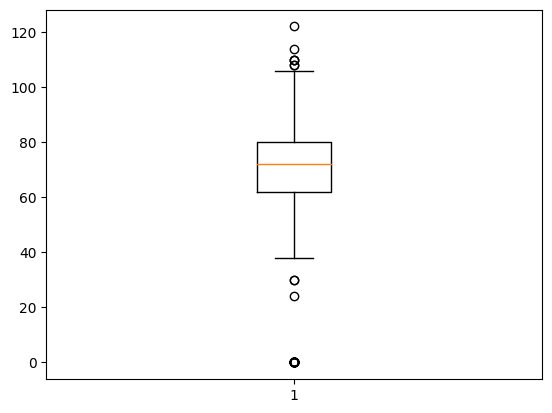

In [25]:
#Veći broj nedostajućih vrijednosti se pogotovo vidi na grafu značajke "Blood Pressure" - njih 35

plt.boxplot(df.BloodPressure)
print('Blood Pressure <= 20: ', (df.BloodPressure <= 20).sum())
print('Blood Pressure <= 34: ', (df.BloodPressure <= 34).sum())
print('Blood Pressure >= 108: ', (df.BloodPressure >= 108).sum())

In [29]:
#Prikaz korelacijske matrice

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


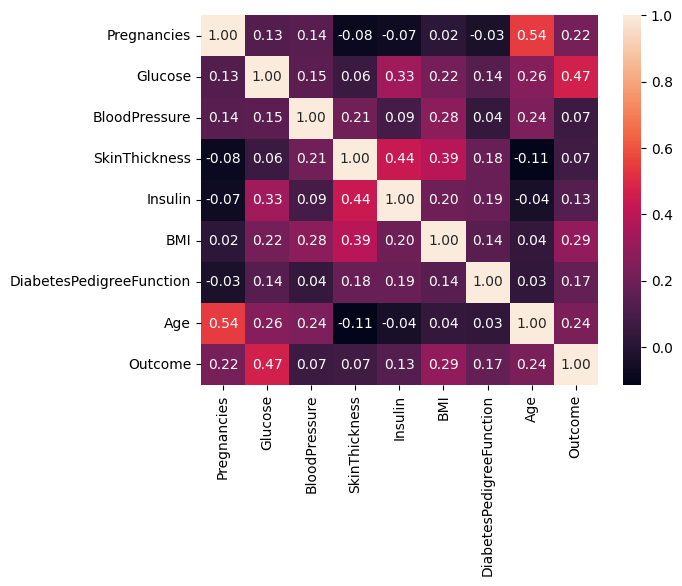

In [39]:
#Isti prikaz na toplinskoj mapi

sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

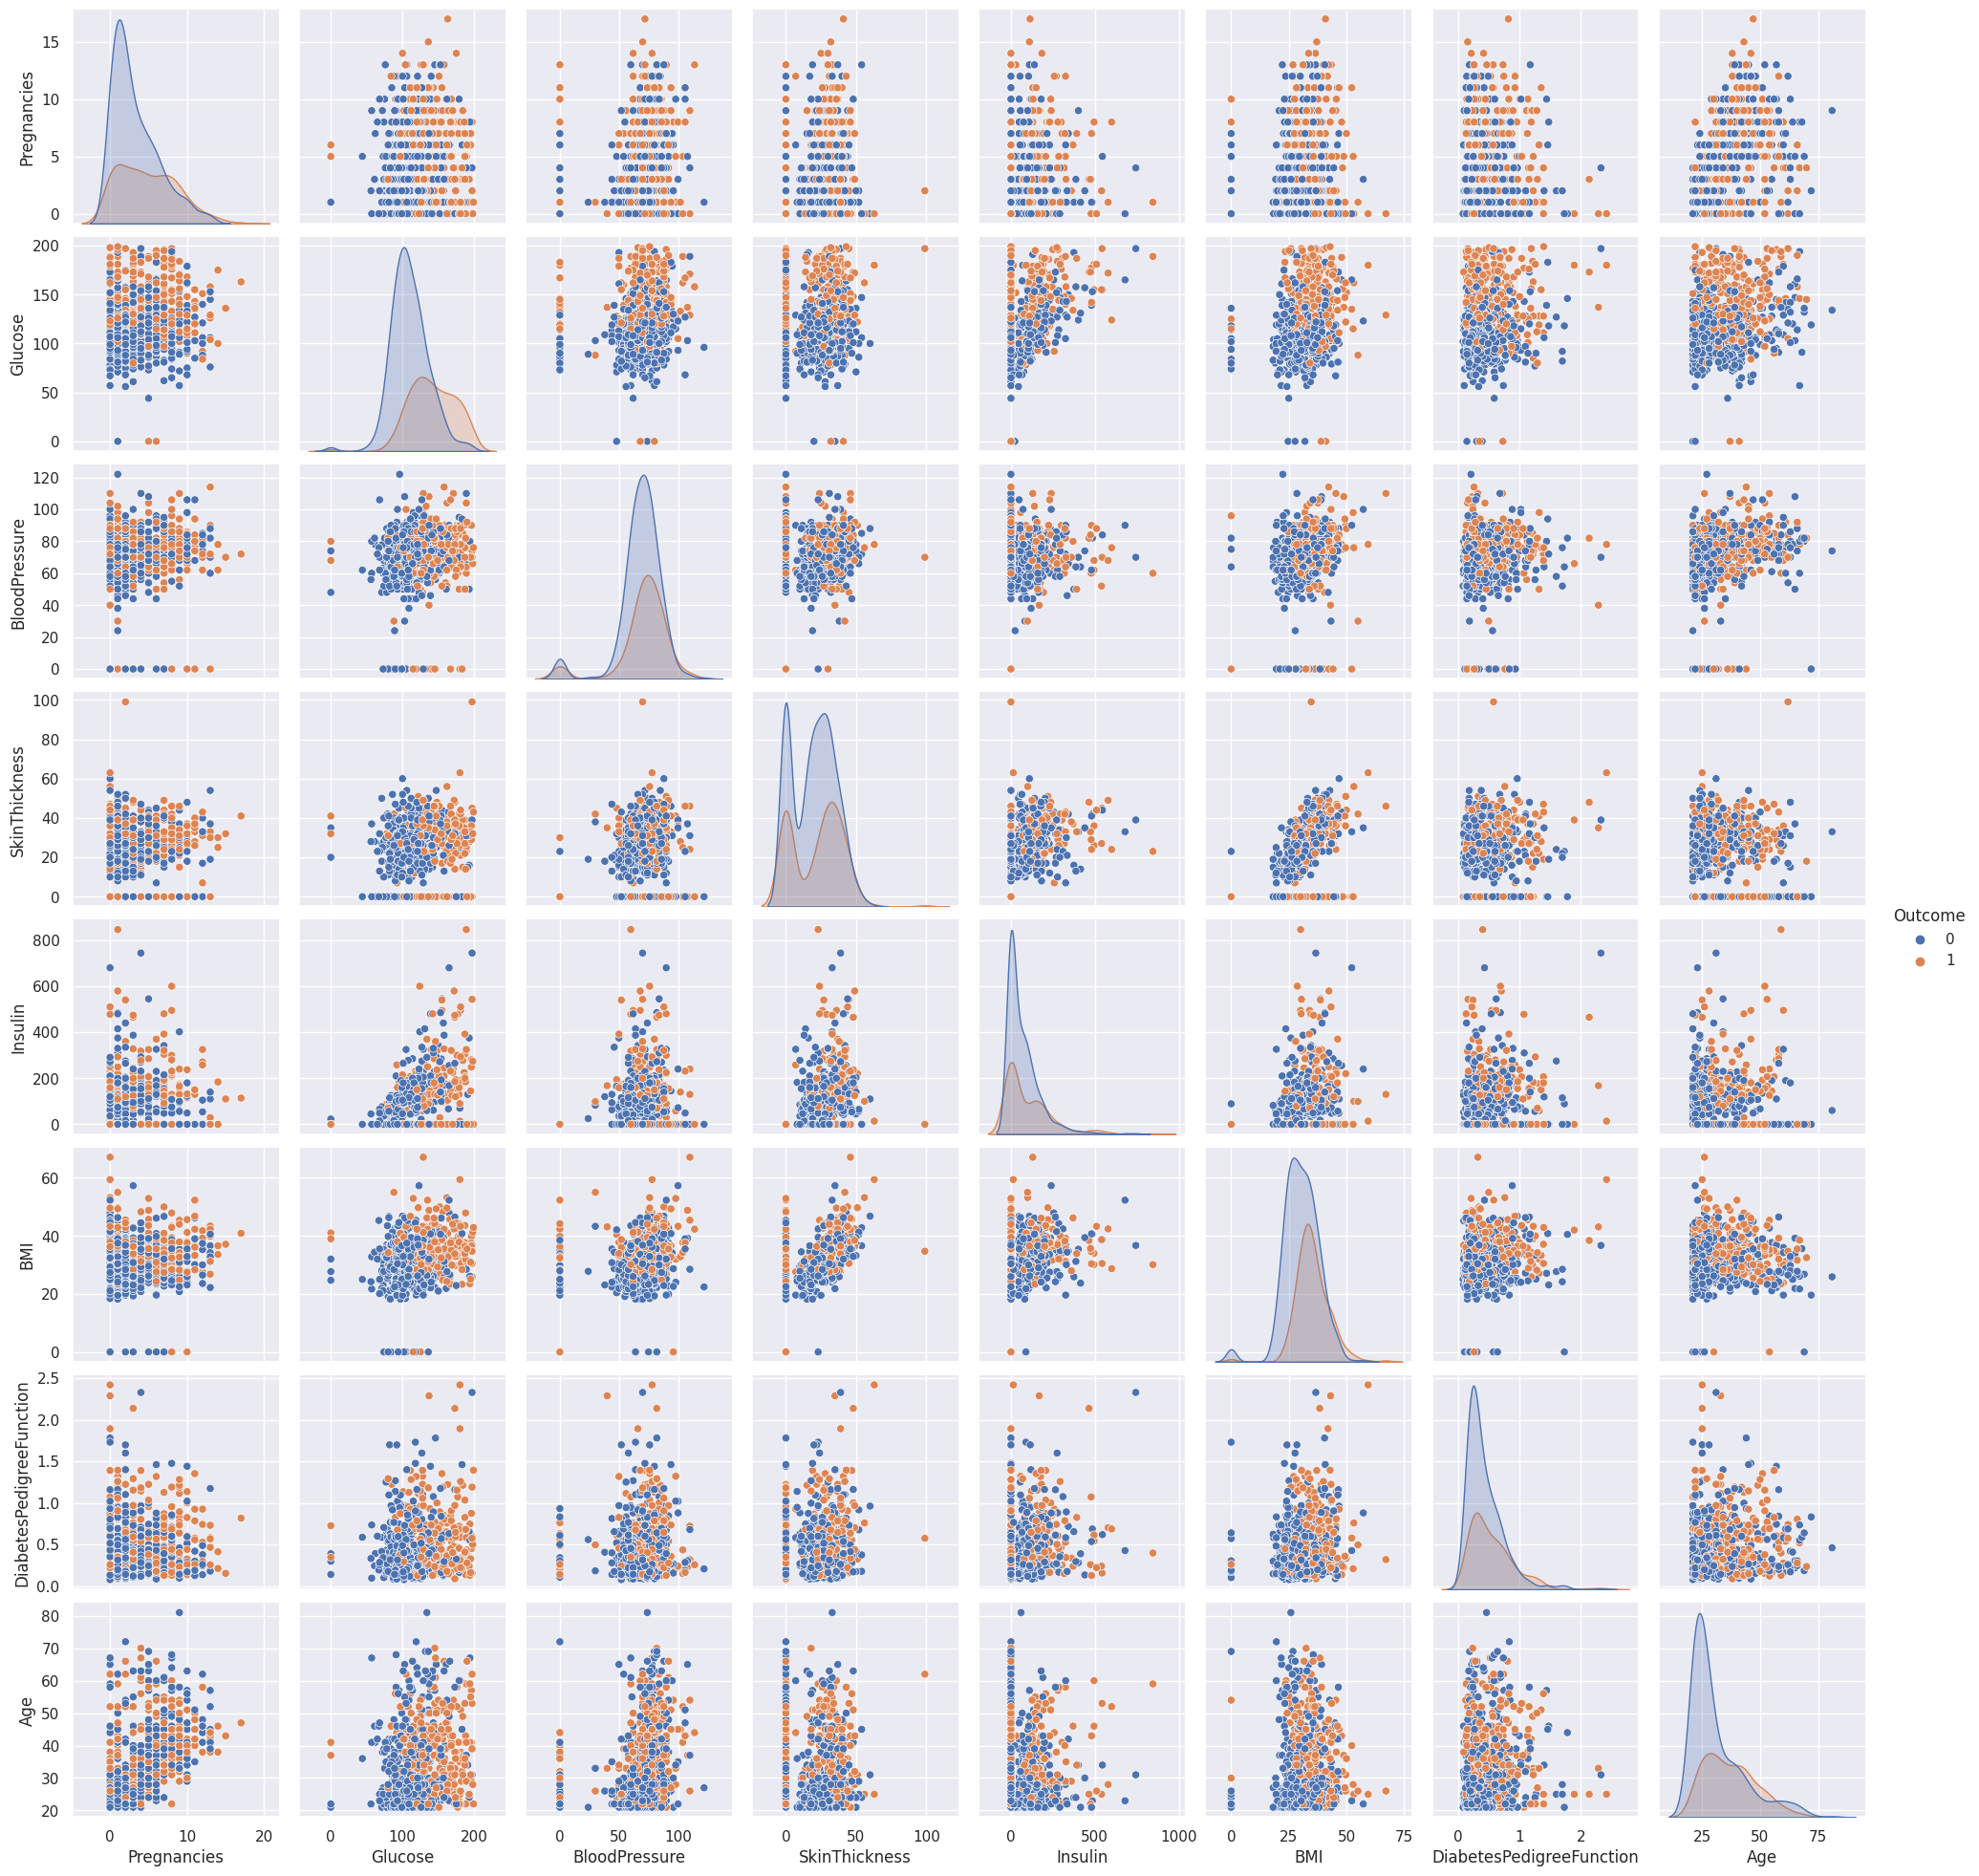

In [49]:
#Matrica dijagrama raspršenja, osobe s dijabetesom su obojane drugom bojom radi preglednosti

sns.pairplot(df, hue="Outcome")
plt.show()